# **Load the Data**

In [12]:
import pandas as pd

# Load the dataset
file_path = "C:\\Users\\ACDC\\Desktop\\techem\\assignment2\\energy+efficiency\\ENB2012_data.xlsx"
df = pd.read_excel(file_path)

# Display first few rows of the dataset
df.head()


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


# **Preprocess the Data**

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Extract features and target
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]  # Features
y = df['Y1']  # Target (Heating Load)

# Check for missing values
print(X.isnull().sum())
print(y.isnull().sum())

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training, validation, and testing
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check shapes
print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Testing set: {X_test.shape}")


X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
dtype: int64
0
Training set: (460, 8)
Validation set: (154, 8)
Testing set: (154, 8)


# **Train Linear Regression Model**

In [18]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Range of alpha values for Ridge regression
alphas = np.logspace(-6, 6, 10)

best_alpha = None
best_r2 = -float('inf')
best_model = None

for alpha in alphas:
    # Train the Ridge model
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Predict on validation set
    y_val_pred = model.predict(X_val)
    
    # Calculate R-squared and MSE
    r2 = r2_score(y_val, y_val_pred)
    
    # Find the best model
    if r2 > best_r2:
        best_r2 = r2
        best_alpha = alpha
        best_model = model

print(f"Best alpha: {best_alpha}")
print(f"Best R^2 on validation data: {best_r2}")


Best alpha: 1e-06
Best R^2 on validation data: 0.9050278957562318


# **Final Evaluation**

In [21]:
# Final evaluation on the test set
y_test_pred = best_model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Final R^2 on test data: {r2_test}")
print(f"Final MSE on test data: {mse_test}")


Final R^2 on test data: 0.919587051539829
Final MSE on test data: 7.902087551028092


# **Model Coefficients**

In [24]:
# Model coefficients and intercept
coefficients = best_model.coef_
intercept = best_model.intercept_

print("Model Coefficients:")
print(coefficients)
print(f"Intercept: {intercept}")

Model Coefficients:
[-6.3387497  -3.45207057  0.81839827 -3.76150168  7.27938709 -0.02022384
  2.68394581  0.37842862]
Intercept: 22.169556459891613


# **Feature Importance**

In [27]:
# Rank features based on absolute values of coefficients
feature_importance = np.abs(coefficients)
top_features = np.argsort(feature_importance)[::-1][:5]

print(f"Top 5 features based on coefficient importance:")
for feature_idx in top_features:
    print(f"Feature {df.columns[feature_idx]}: {coefficients[feature_idx]}")


Top 5 features based on coefficient importance:
Feature X5: 7.279387090771131
Feature X1: -6.338749700965624
Feature X4: -3.7615016768572707
Feature X2: -3.4520705737723416
Feature X7: 2.6839458130805545


# **Visualizing the Training Data**

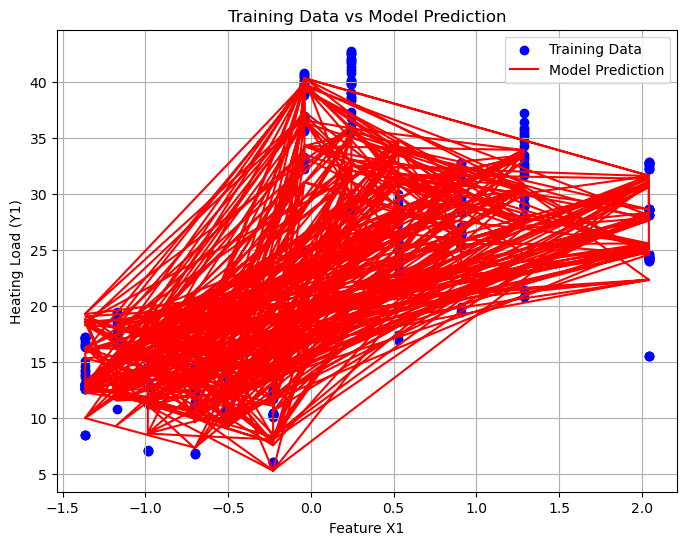

In [30]:
import matplotlib.pyplot as plt

# Plotting the training data vs predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], y_train, color='blue', label='Training Data')  # Scatter plot of actual data
plt.plot(X_train[:, 0], best_model.predict(X_train), color='red', label='Model Prediction')  # Model line
plt.xlabel('Feature X1')
plt.ylabel('Heating Load (Y1)')
plt.legend()
plt.title('Training Data vs Model Prediction')
plt.grid(True)
plt.show()


# **Predicted vs Actual (Scatter Plot)**

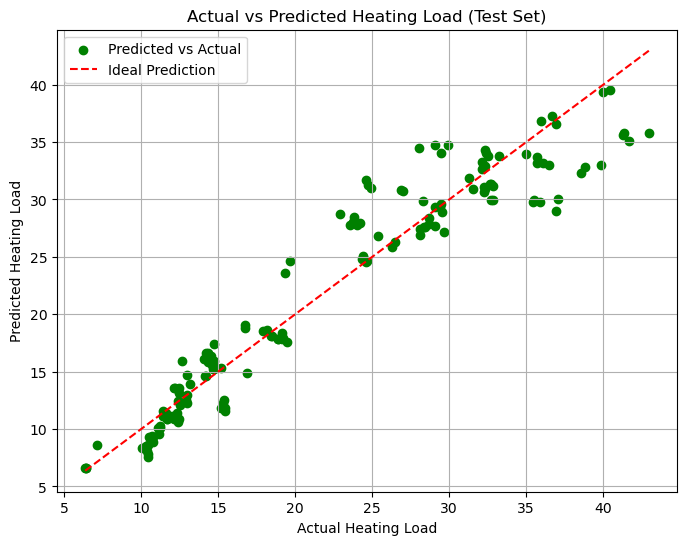

In [33]:
# Plotting predicted vs actual values on the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction')  # Ideal line y=x
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.legend()
plt.title('Actual vs Predicted Heating Load (Test Set)')
plt.grid(True)
plt.show()


# **Coefficient Visualization**

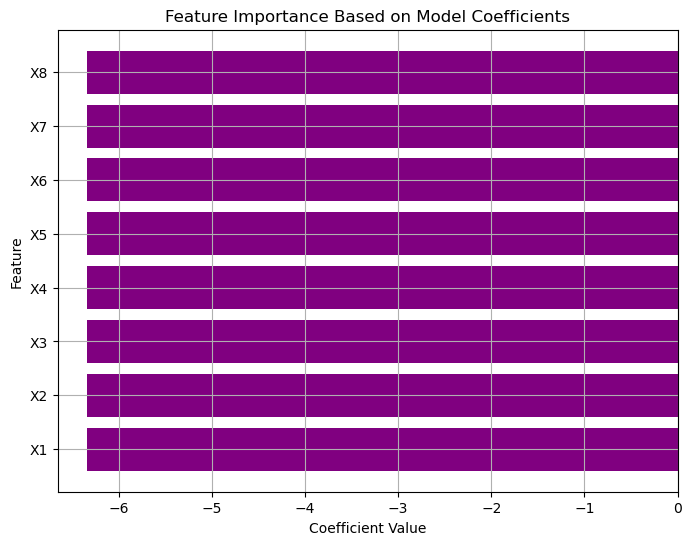

In [36]:
# Plotting the coefficients of the model to see feature importance
plt.figure(figsize=(8, 6))
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
plt.barh(features, best_model.coef_[0], color='purple')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance Based on Model Coefficients')
plt.grid(True)
plt.show()
